# Laser Additive Manufacturing Project Guide
This Notebook will help you structure your LAM simulation. To see an example of the process you are modeling click the drop-down. Each section contains questions to help you think about the code writing process. This is a **Suggested** structure but it does not have to be how you format your code. There are many ways to simulate a process and even more ways to write the code for a simulation. Feel free to test your ideas even if they might not fit. The most important idea that you should keep with you is this: 

**If your code doesn't work and you have no idea why, that is okay!**

**Every code writer has felt that frustration and if you keep putting in the effort and asking questions, you will get better.**
<hr>

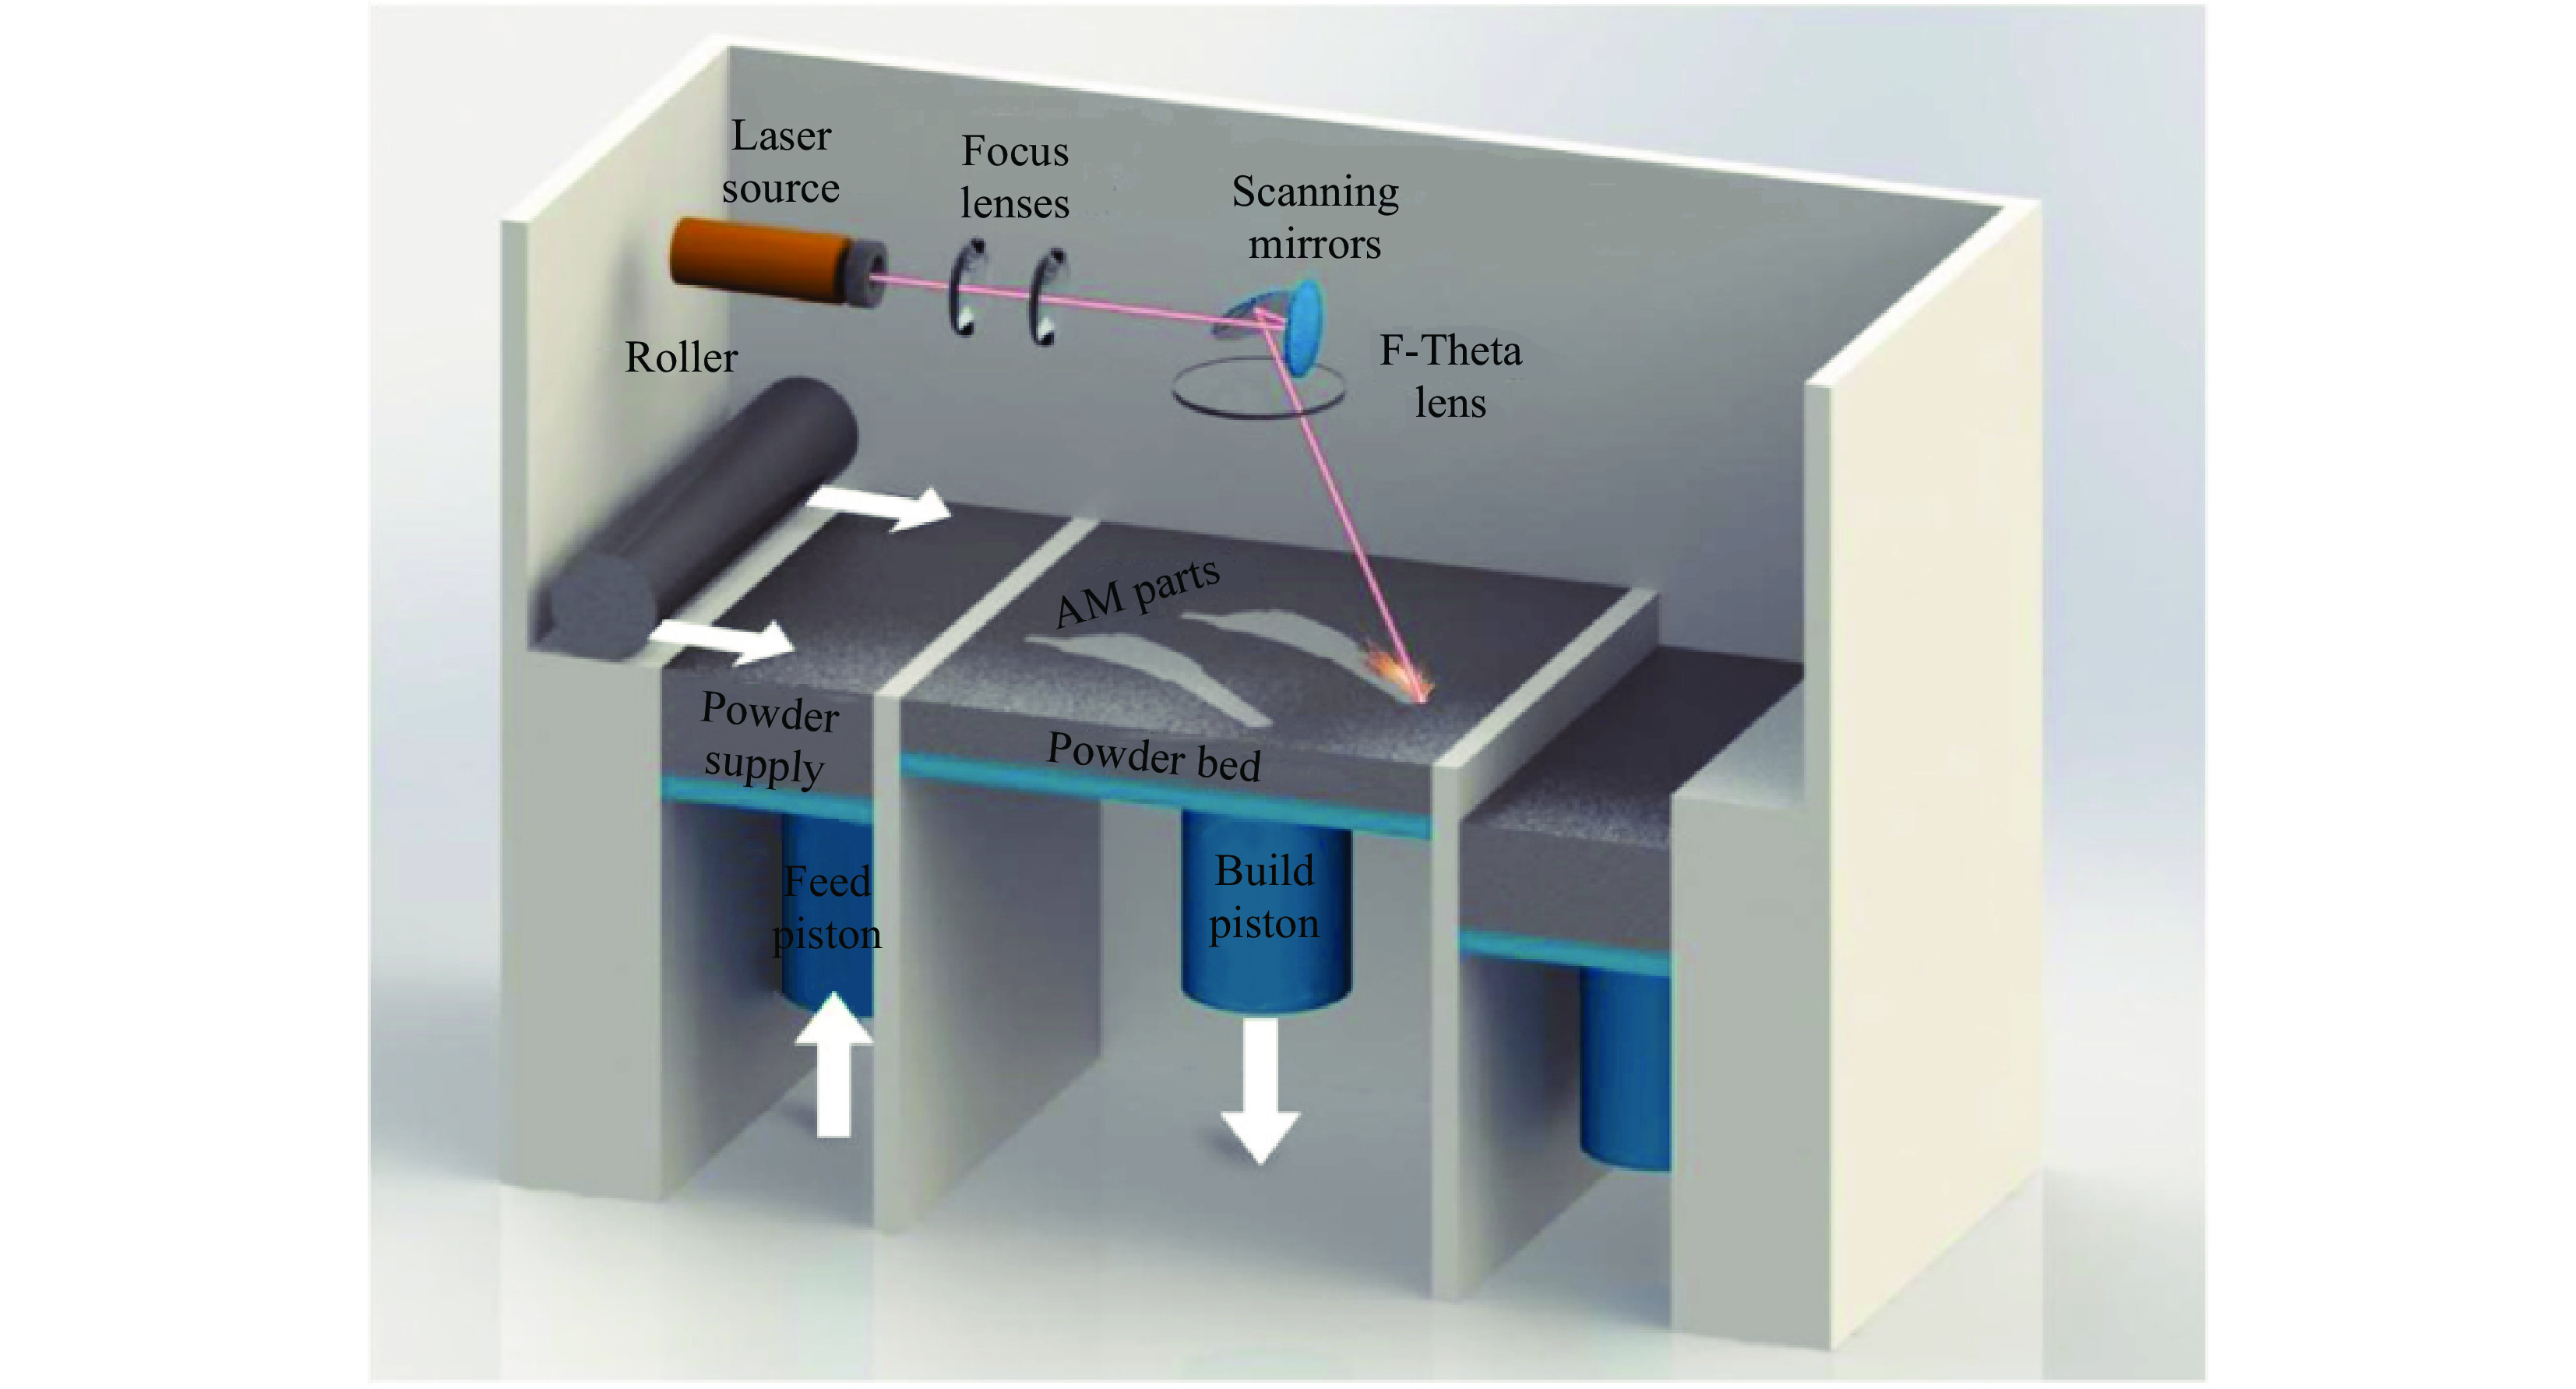

# Practical Heat Transfer Theory
The heat transfer equations and physical properties used in the LAM simulation demonstration can be found here. 

### Physical Properties Used in The LAM Demo: (Feel free to experiment but stay around these values)
    T0 = 300;                         # Initial ambient temperature [K]
    k = 15; 			  # conductivity coefficient [W/m/K]
    cp = .5*1000; 			  # specific heat [J/g/c]-->[J/kg/K]
    rho = 8*1000; 		          # density [g/cc]-->[kg/m^3]
    Melt_Temp = 1670;                 # Melting point of material [k]
    Est_Max_Temp = 2600;              # Estimated Max Temperature [K] (Should never exceed 3500 [K])
<hr>

### Heat Transfer Equations:
**The Temperature of a Mesh Node After Being Heated by a Gaussian Distributed Laser:** 
<p style="text-align: center;">$T_n(x,y) = T_0(x,y) + \frac{q\cdot{dt}}{\rho{c_p}\pi\cdot(4\pi\alpha\cdot{dt})^{\frac{1}{2}}}\cdot\frac{1}{4\alpha\cdot{dt}+2\sigma^{2}}\cdot{e^{(-\frac{(x-x')^2+(y-y')^2}{2\sigma^2+4\alpha\cdot{dt}})}}$</p>

**The Temperature of a Mesh Node After Diffusion Occurs:**
<p style="text-align: center;">$T_{i,j}^{t} = [\frac{1}{1+2\alpha{dt(\frac{1}{dx^2}+\frac{1}{dy^2})}}]\cdot[T_{i,j}^{t-1} + (\alpha{dt})(\frac{T_{i-1,j}^{t}+T_{i+1,j}^{t}}{dx^2}+\frac{T_{i,j-1}^{t}+T_{i,j+1}^{t}}{dy^2})]$</p>

<h6 style='text-align: center;'> Variable List</h6> 

| Variable | Name | Units|---------------| Variable | Name | Units|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$(x,y)$|Measurement Location|$m$|---------------|$(x',y')$|Heat Source Location|$m$|
|$T_n$| Current Temperature<br>at $(x,y)$| $K$ |---------------|$T_0$| Previous Temperature<br>at$(x,y)$| $K$
|$(i,j)$|Active Node|$none$|---------------|($i+-1$,$j+-1$)|Adjacent Node|$none$|
|$T^t$| Current Temperature<br>for Node| $K$ |---------------|$T^{t-1}$| Previous Temperature<br>for Node| $K$
|$q$| Heat Rate | $W$ |---------------|$dt$| Change In<br>Time | $sec$
|$\rho$| Density of Material| $\frac{kg}{m^3}$ |---------------|$c_p$| Specific Heat<br>of Material | $\frac{J}{kg\cdot{K}}$
|$k$|Conduction Coefficient<br>of Material| $\frac{W}{m\cdot{K}}$|---------------|$\alpha$|Thermal Diffusivity<br>of Material|$\frac{m^2}{s}$
|$\sigma$|Distribution Parameter|$m$|---------------|$dx$ or $dy$|Distance Between<br>Nodes|$m$|
<hr>

### Equations in Code Form: (To Check Your Code or Save Time)
**The Temperature of a Mesh Node After Being Heated by a Gaussian Distributed Laser:** 

    q_dt = q*dt;
    Denom_Out = 2*np.pi*rho*cp*((4*np.pi*alpha*dt)**(1/2))*(2*alpha*dt+Sigma**2);
    Num_xy = ((x[i][j]-xq_pos[t-1])**2)+((y[i][j]-yq_pos[t-1])**2);
    Denom_xy = 4*alpha*dt + 2*(Sigma**2);
    T[i][j] = T_pre[i][j] + ((q_dt)/Denom_Out)*np.exp(-(Num_xy/Denom_xy)); 

**The Temperature of a Mesh Node After Diffusion Occurs:**

    T[i][j]= (1/(1+2*alpha*dt*((1/dx**2)+(1/dy**2))))*(T_pre[i][j]+(alpha*dt)*(((T[i-1][j]+T[i+1][j])/dx**2)+((T[i][j-1]+T[i][j+1])/dy**2)))

<hr>

# Useful Packages and Tools
If you are looking for ways to turn your ideas into code, some options are listed here. 

## General Tools:
- **range(start,stop,increment)**: Creates an increasing or decreasing sequence of numbers that can be useful for making loops.

- **len(#)**: Gives the number of elements within an array or list called #. 

- Empty_List = **List()**: Creates an empty list with the name "Empty_List". Useful when storing large sets of data that need to be called later.

- **sum(List)**: Adds all elements of the list together.

- **int(#) or float(#)** Can change the data type of # to either an integer or float. (May be useful for creating loops)

- x**y : This represents x^y in python. If it is used in a long equation it may help to put paranthesis around the terms for clarity.

<hr>

## NumPy - For Data Management and Calculations
NumPy is Imported as np
### Data Management and Storage:
- **np.linspace(start#,end#,total_elements#)**: Creates a linear array of numbers from the start value to the end value. The array will have the specified number of elements in it. (Including the start and end values)

- **np.meshgrid(1D Array, 1D Array)**: Creates a linearly spaced mesh using two linearly spaced 1D arrays. Meshgrid can produces the position of each mesh node if given an output. **Example [X,Y] = np.meshgrid(X_Vector, Y_Vector)**. X contains the x-coordinates for every mesh node and Y does the same but for the y-coordinates. X_Vector and Y_Vector must be linierly spaced arrays. Using **np.linspace** helps ensure the meshgrid will work.

- **np.array([rows,colums])**: Generates a NumPy array that can be used in calculations. Can be left empty using ([]).
    - To use a value from a specific array address in an array called "Array" use this format: **Array[row,column] or Array[row][column]**
      
- **np.array([List])**: Transforms a list into a Numpy array if possible.

- **np.append(Array,Value)**: Inserts a value to the end of an array. Can also be used like this: **Array.append(Value)**

- **np.concatenate((Array_1,Array_2))**:  Inserts Array_2 after the last row in Array_1. The arrays must have the same number of columns.

- **np.vstack((Array_1,Array_2))**: Inserts Array_2 after the last row in Array_1. The arrays must have the same number of columns. (like concatenate)

- **np.hstack((Array_1,Array_2))**: Inserts Array_2 after the last column in Array_1. The arrays must have the same number of rows.

### Calculations:
- **+-*/**: All opperations can be used with NumPy Array elements.

- x**y : This represents x^y in Python. If it is used in a long equation it may help to put paranthesis around the terms for clarity.

- **np.exp(x)**: This represents e^x in Python using NumPy.

- **np.sqrt(x)**: This allows for the square root function to be used in Python.

- **np.pi**: The value of Pi can be used in NumPy.
  
<hr>

## MatPlotLib - For Plotting and Creating Animations
matplotlib.pyplot is imported as plt
### Making a Figure:
- **plt.subplots(m,n)**: Creates a figure that has m plot rows and n plot columns. Using subplots produces axis objects that can be used to directly edit the axis of the different plots. **Example: Fig,(Ax1,Ax2) = plt.subplots(1,2)**. Where Fig is a figure object and Ax1 or Ax2 are axis objects saved for use later.

- **Figure Options:(Where Fig is a Figure Object)**
    - Fig.set_figheight(#) or Fig.set_figwidth(#)
    - Fig.suptitle('String')

- **Axis Object Options: (Where Ax is an Axis Object)**
     - Ax.set_title('String')
     - Ax.set_xlabel('String') or Ax.set_ylabel('String')
     - Ax.set_xlim((#,#)) or Ax.set_ylim((#,#))
     - Ax.text(x#, y#,'String', transform=Ax.transAxes,fontsize=#) to add text to a plot
     - plt.rcParams.update({'text.color': "COLOR NAME"}): Replace "COLOR NAME" to change the color of the text being used in the figure.

### Plotting Temperature: 
- **plt.contourf(1D Array, 1D Array, 2D Array, cvals,cmap= )** or **Ax.contourf(1D Array, 1D Array, 2D Array, cvals,cmap = )**:
  This plots the relationship between a 2D array and 2 1D arrays. Perfect for temperature mapping.
    - cvals is a 1D Array of numbers that represents the layers being added to the contour plot. (could use **range** or **np.linspace** to create it)
    - cmap is the color map used for the contour plot.*The color map can be changed by **importing cm from matplotlib**. Example: cmap = cm.jet
    - A plot object can be created to aid animations. Example:  **Plot = plt.contourf()**

### Updating and Clearing Plots:

- **hdisplay = display.display("String", display_id=True)**: (Must import display from IPython) This can be used to create a display ID. Having a display ID makes Figure updates easier.
  - **hdisplay.update(Fig)**: This updates the figure item "Fig" that is shown using the hdisplay ID.
- **Time.sleep(#)** (time must be imported): Used to tell the computer to wait # seconds. Using this after plotting ensures that a figure is shown during a fast loop.
- **Plot.remove()**: Where Plot is a plot object. Removing plot objects after displaying them can improve the performance of the code.
- **plt.close()**: Closes and stops further changes to any open figures.
<hr>

## Numba - For Accelerating the Compilation of Python Code (Only if time permits)
- Numba takes code written in the language of Python and translates it to a computer's native language.
- NumPy and Numba are very compatible and share many tools. 
- Numba is applied to code through function decorators
- The inputs and outputs of a Numba decorated function must be explicitly defined or errors will occur.
  - There are many things that can be flagged in a Numba function, so debugging can be extensive.
- Numba is tricky to learn but can make large codes run with ease.

### Example of a Numba function decorator:
    @njit('(float64[:,:])(int64,int64,float64,float64,float64,float64,float64[:,:],float64[:,:])')
    def Diffusion(nx,ny,alpha,dt,x_area,y_area,T_pre,T):
    
        return diff_new
<hr>

# Key Questions
To spark some ideas, look here!

## Packages
What tools will be needed to complete the simulation?

- Will you be working with large data sets?
- Will you need to plot the results?
- If there are plots, what display format would work best?
  <hr>
## Input Parameters
What values or properties should a user be able to control?

- Are there units assigned to the values? If so, do they match the units used in calculations?
- Are the inputs well defined and easy to edit?
- Are all inputs necessary for the simulation to function
  <hr>
## Generators and Functions
### Laser Path Generator
How will the movement of the laser be accounted for?

- What values should be calculated and stored for further use?
- Is the laser able to start and stop, or will it run during the whole path?
- How will the position of the laser be found for each timestep?
- Does the laser need move at a constant rate?
### Mesh and Initial Value Generator
What physical properties, variables, or arrays need to be initialized for the simulation to start calculations?

- How can NumPy's meshgrid and linspace tools be used to create a 2D mesh for data collection?
- Do the initial values match the units used in the simulation calculations?
- Are all constants and coefficients defined for the simulation calculations?
### Calculation Functions
What calculations are required to solve for the temperature at all mesh nodes during every timestep? 

- How can the temperature distribution created by laser be calculated using the 2D mesh, user inputs, and heat transfer theories?
- How can heat diffusion be accounted for given the user inputs, change in time, and heat transfer theories?
- When should diffusion be applied to the simulation? (Before or after the laser distribution?)
- Which nodes can be assigned new temperatures and which nodes must have constant temperatures?
### Plot Functions
How can MatPlotLib's plot tools be used to show the 2D temperature distribution calculated in the simulation?

- What axis labels or features would help a user understand the results of the simulation?
- What plot features can be set once and not have to be changed again? (features defined out of a loop)
- What plot features need to be cleared and changed for each timestep? (features defined in a loop)
- Does the plot show where melting occurs?
  <hr>
## Function Calls: (Main)
How and when will the functions be called to produce the LAM Simulation?

- What is the best order to call the functions?
- Are variables being overwritten each time, or is a new variable created?
- Is the plot seen after every calculation is completed?
- Is the Main code simple and easy to follow?
- Can the Main code be optimized further to improve performance?
  <hr>